In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from glob import glob

savefig = True

In [2]:
glob('timings/CP*.json')

['timings/CP-a-rot-heu0-restart1.json',
 'timings/CP-a-rot-heu2-restart0.json',
 'timings/CP-a-heu1-restart0.json',
 'timings/CP-heu0-restart1.json',
 'timings/CP-a-rot-heu0-restart2.json',
 'timings/CP-a-rot-heu1-restart2.json',
 'timings/CP-a-heu2-restart2.json',
 'timings/CP-a-heu1-restart2.json',
 'timings/CP-a-rot-heu1-restart0.json',
 'timings/CP-a-rot-heu2-restart2.json',
 'timings/CP-a-heu0-restart1.json',
 'timings/CP-a-rot-heu0-restart0.json',
 'timings/CP-a-rot-heu2-restart1.json',
 'timings/CP-a-heu1-restart1.json',
 'timings/CP-a-heu0-restart0.json',
 'timings/CP-a-heu2-restart1.json',
 'timings/CP-a-heu2-restart0.json',
 'timings/CP-a-heu0-restart2.json',
 'timings/CP-a-rot-heu1-restart1.json',
 'timings/CP-a-dual-heu0-restart1.json']

In [3]:
n_istances = 40
idxs = np.arange(n_istances)

def load_json(name):
    with open(name) as f:
        data = np.array([v for v in json.load(f).values()])
    return data

def get_stats(timings):
    no_timeout = timings < 300
    stats = {
        'solved instances': no_timeout.sum(),
        'average time (all)':  timings.mean(),
        'average time (solved)': timings[no_timeout].mean()
    }
    return stats

def make_table(many_timings, bbox=(0.05, 0.60, 0.17, 0.17)):
    spaces = 10
    rows = (' ' * spaces, ' ' * spaces)
    rowcolors = ('C0', 'C1')
    cols = ('Solved \ninstances', 'Average\nruntime')
    
    stats = [get_stats(timings) for timings in many_timings]
    t = [[f'{s["solved instances"]}/40', f'{s["average time (all)"]:.2f} s'] for s in stats]
    return plt.table(t, rowLabels=rows, rowColours=rowcolors, colLabels=cols, bbox=bbox)

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                f'{height:.0f}', fontsize=10, ha='center', va='bottom',)

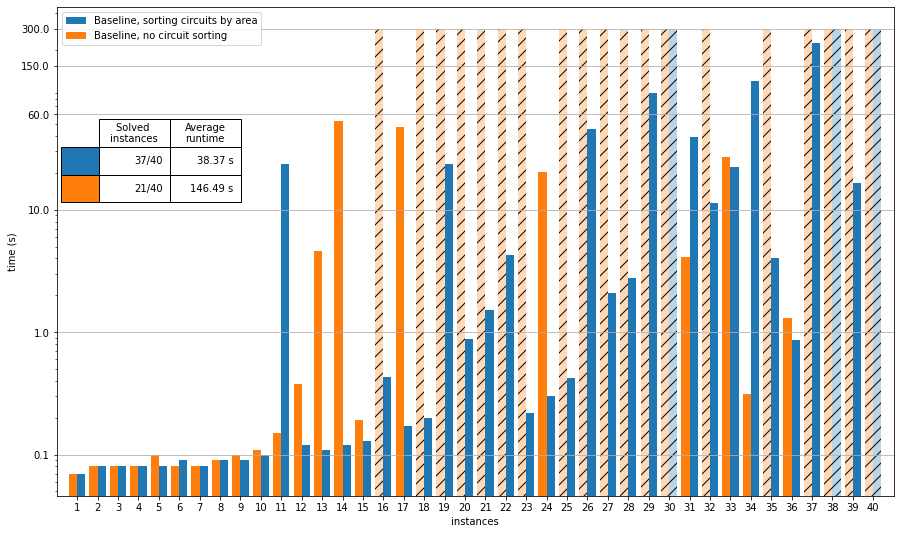

In [4]:
w = 0.4
no_area = load_json('timings/CP-heu0-restart1.json')
baseline = load_json('timings/CP-a-heu0-restart1.json')

bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline, sorting circuits by area')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Baseline, no circuit sorting')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
# ax.set_title('CP baselines')
if savefig:
    fig.savefig('CP_baseline')
plt.show()

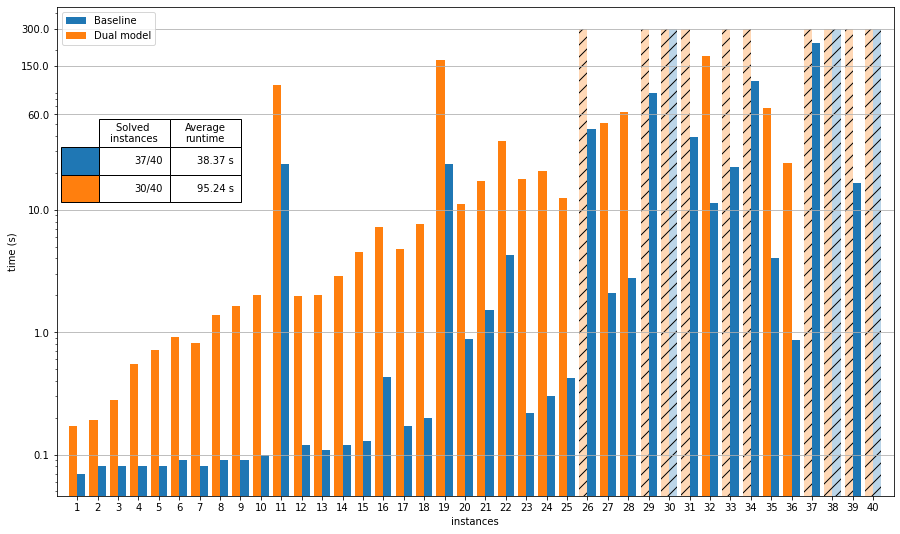

In [5]:
dual = load_json('timings/CP-a-dual-heu0-restart1.json')

w = 0.4

bl_done = np.argwhere(baseline < 300).squeeze()
dual_done = np.argwhere(dual < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
dual_timeout = np.argwhere(dual >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label=f'Baseline')
r2 = ax.bar(dual_done - (w/2) + 1, dual[dual_done], width=w, color='C1', align='center', 
            label=f'Dual model')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', hatch='//', alpha=0.3, align='center')
r4 = ax.bar(dual_timeout - (w/2) + 1, dual[dual_timeout], width=w, color='C1', hatch='//', alpha=0.3, align='center')

table = make_table([baseline, dual])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('CP_dual')
plt.show()

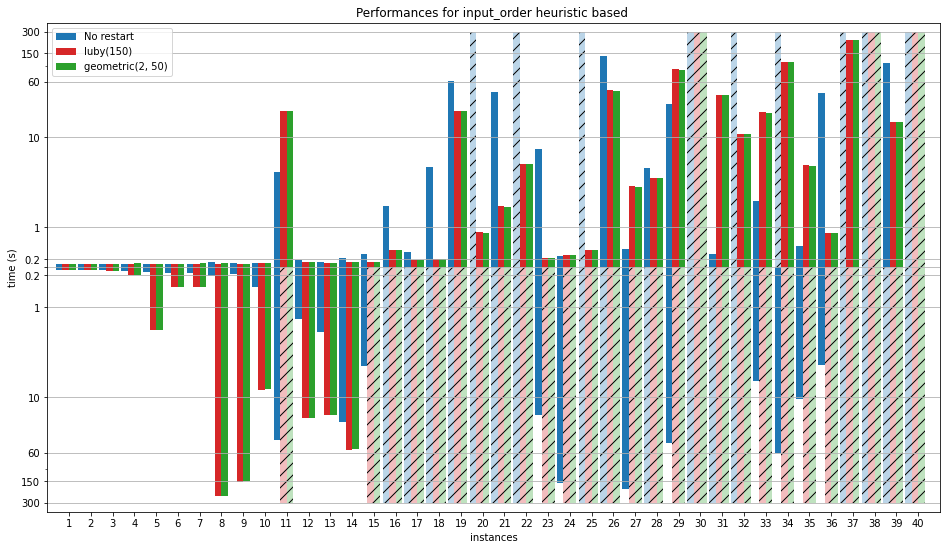

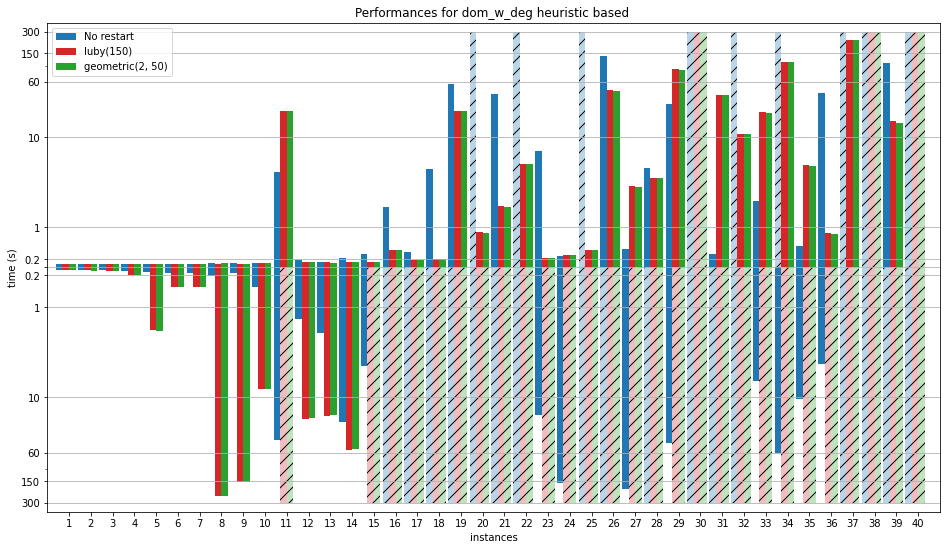

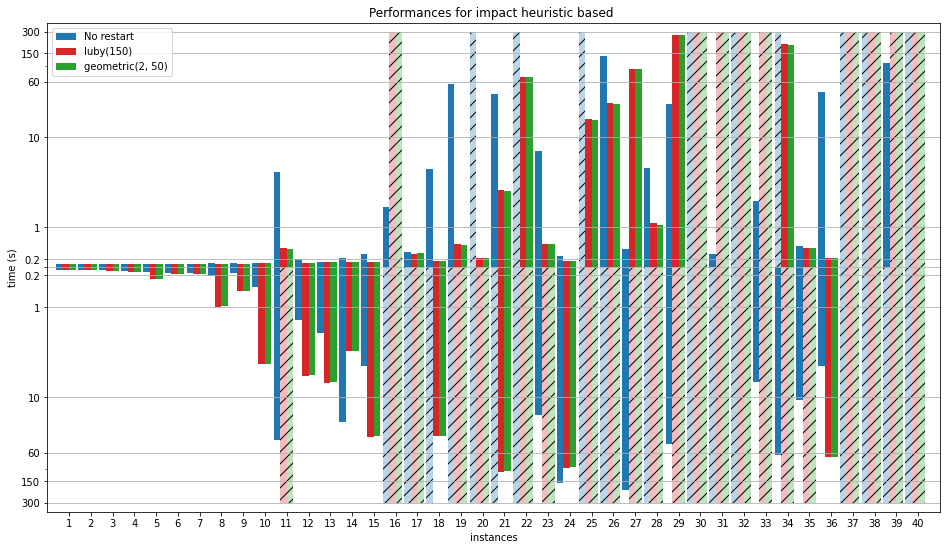

In [6]:
w = 0.3
int2heu = {0: 'input_order', 1: 'dom_w_deg', 2: 'impact'}
for heu in (0, 1, 2):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    for rot in (False, True):
        restart0 = load_json(f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart0.json')
        restart1 = load_json(f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart1.json')
        restart2 = load_json(f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart2.json')
    
        r1_done = np.argwhere(restart0 < 300).squeeze()
        r2_done = np.argwhere(restart1 < 300).squeeze() 
        r3_done = np.argwhere(restart2 < 300).squeeze() 
        r1_timeout = np.argwhere(restart0 >= 300).squeeze()
        r2_timeout = np.argwhere(restart1 >= 300).squeeze()
        r3_timeout = np.argwhere(restart2 >= 300).squeeze()
        if rot:
            restart0 *= -1
            restart1 *= -1
            restart2 *= -1

        r1 = ax.bar(r1_done - (3*w/2) + 1, restart0[r1_done], width=w, color='C0', align='center', 
                    label=f'{"No restart" if not rot else ""}')
        r2 = ax.bar(r2_done - (w/2) + 1, restart1[r2_done], width=w, color='C3', align='center', 
                    label=f'{"luby(150)" if not rot else ""}')
        r3 = ax.bar(r3_done + (w/2) + 1, restart2[r3_done], width=w, color='C2', align='center', 
                    label=f'{"geometric(2, 50)" if not rot else ""}')
        r4 = ax.bar(r1_timeout - (3*w/2) + 1, restart0[r1_timeout], width=w, color='C0', hatch='//', alpha=0.3, align='center')
        r5 = ax.bar(r2_timeout - (w/2) + 1, restart1[r2_timeout], width=w, color='C3', hatch='//', alpha=0.3, align='center')
        r6 = ax.bar(r3_timeout + (w/2) + 1, restart2[r3_timeout], width=w, color='C2', hatch='//', alpha=0.3, align='center')
        ax.set_xlabel('instances')
    ax.set_title(f'Performances for {int2heu[heu]} heuristic based ')
    ax.set_ylabel('time (s)')
    ax.set_xlim(0, 41)
    ax.set_ylim(-400, 400)
    ax.set_xticks(list(range(1, 41)))
    ax.legend()
    ax.set_yscale('symlog')
    ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
    ax.get_yaxis().set_major_formatter(ScalarFormatter())
    ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
    ax.grid(axis='y')
    if savefig:
        fig.savefig(f'CP_heuristic{heu}')
    plt.show()

In [7]:
for rot in (False, True):
    for heu in (0, 1, 2):
        for restart in (0, 1, 2):
            name = f'timings/CP-a{"-rot" if rot else ""}-heu{heu}-restart{restart}.json'
            data = load_json(name)
            s = get_stats(data)
            print(f"heu: {heu}, restart: {restart}, {'with rotations' if rot else ''}")
            print(f"solved: {s['solved instances']}, avg time: {s['average time (all)']:.2f}\n")

heu: 0, restart: 0, 
solved: 31, avg time: 78.62

heu: 0, restart: 1, 
solved: 37, avg time: 38.37

heu: 0, restart: 2, 
solved: 37, avg time: 38.12

heu: 1, restart: 0, 
solved: 31, avg time: 78.39

heu: 1, restart: 1, 
solved: 37, avg time: 38.37

heu: 1, restart: 2, 
solved: 37, avg time: 38.18

heu: 2, restart: 0, 
solved: 31, avg time: 78.38

heu: 2, restart: 1, 
solved: 31, avg time: 84.58

heu: 2, restart: 2, 
solved: 31, avg time: 84.43

heu: 0, restart: 0, with rotations
solved: 23, avg time: 141.64

heu: 0, restart: 1, with rotations
solved: 13, avg time: 214.95

heu: 0, restart: 2, with rotations
solved: 13, avg time: 214.81

heu: 1, restart: 0, with rotations
solved: 23, avg time: 141.62

heu: 1, restart: 1, with rotations
solved: 13, avg time: 215.00

heu: 1, restart: 2, with rotations
solved: 13, avg time: 214.87

heu: 2, restart: 0, with rotations
solved: 23, avg time: 141.93

heu: 2, restart: 1, with rotations
solved: 18, avg time: 174.20

heu: 2, restart: 2, with rotat

In [8]:
glob('timings/SAT*.json')

['timings/SAT-a-rot.json',
 'timings/SAT.json',
 'timings/SAT-a-rot-search.json',
 'timings/SAT-a.json',
 'timings/SAT-a-search.json']

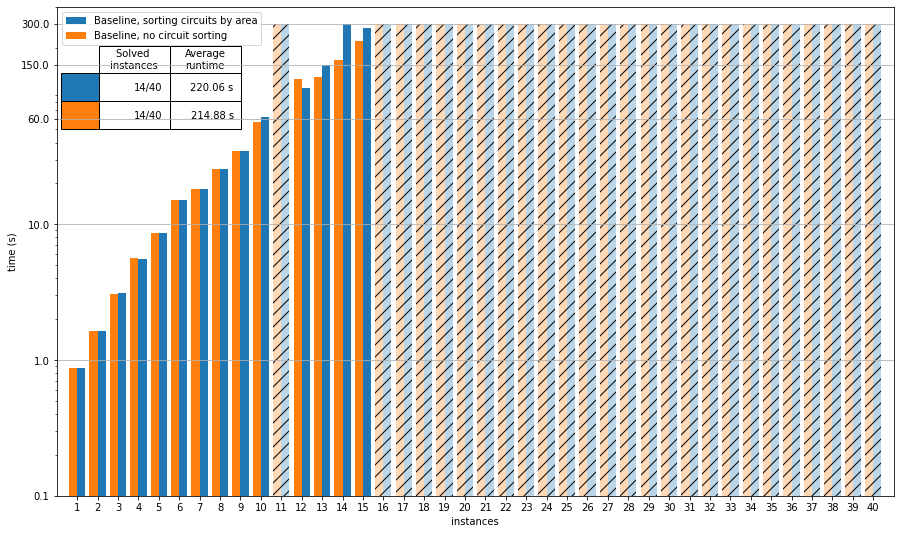

In [9]:
w = 0.4
baseline = load_json('timings/SAT-a.json')
no_area = load_json('timings/SAT.json')
bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline, sorting circuits by area')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Baseline, no circuit sorting')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('SAT_baseline')
plt.show()

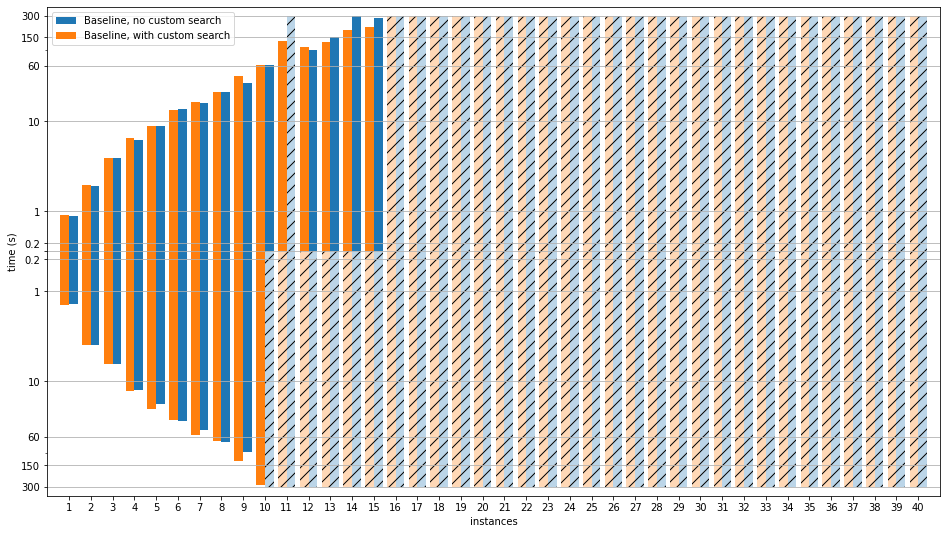

In [10]:
w = 0.4
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

for rot in (False, True):
    baseline = load_json(f'timings/SAT-a{"-rot" if rot else ""}.json')
    search = load_json(f'timings/SAT-a{"-rot" if rot else ""}-search.json')
    bl_done = np.argwhere(baseline < 300).squeeze()
    se_done = np.argwhere(search < 300).squeeze() 
    bl_timeout = np.argwhere(baseline >= 300).squeeze()
    se_timeout = np.argwhere(search >= 300).squeeze()

    if rot:
        baseline *= -1
        search *= -1

    r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
                label=f'{"Baseline, no custom search" if not rot else ""}')
    r2 = ax.bar(se_done - (w/2) + 1, search[se_done], width=w, color='C1', align='center', 
                label=f'{"Baseline, with custom search" if not rot else ""}')
    r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
                hatch='//', alpha=0.3, align='center')
    r4 = ax.bar(se_timeout - (w/2) + 1, search[se_timeout], width=w, color='C1', 
                hatch='//', alpha=0.3, align='center')

    # table = make_table([baseline, no_area], bbox=(0.05, 0.75, 0.17, 0.17))

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_ylim(-400, 400)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('symlog')
ax.set_yticks([-300, -150, -60, -10, -1, -0.2, 0, 0.2, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_yticklabels([300, 150, 60, 10, 1, 0.2, '', 0.2, 1, 10, 60, 150, 300])
ax.grid(axis='y')
if savefig:
    fig.savefig('SAT_search_and_rot')
plt.show()

In [11]:
glob('timings/SMT*.json')

['timings/SMT-a-array.json',
 'timings/SMT-base.json',
 'timings/SMT-a-dual-base.json',
 'timings/SMT-a-rot-base.json',
 'timings/SMT-a-base.json']

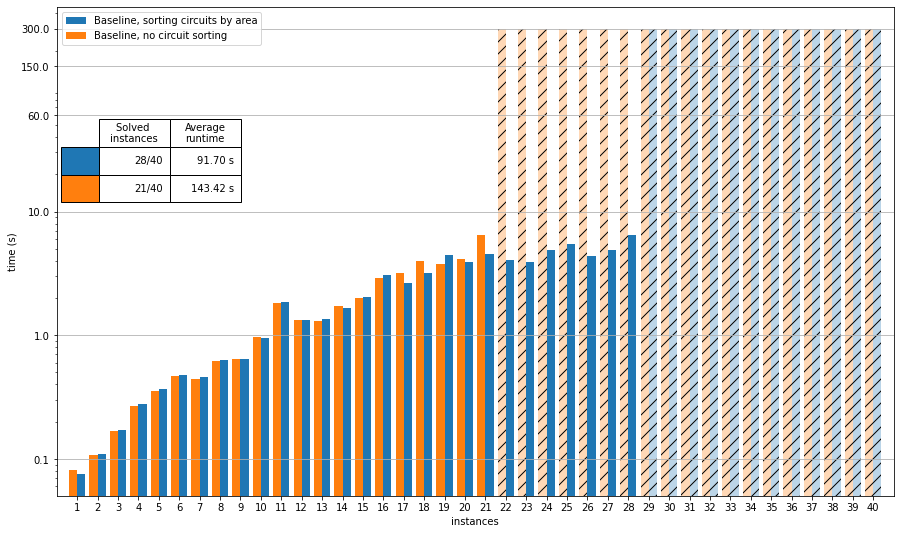

In [12]:
w = 0.4

baseline = load_json('timings/SMT-a-base.json')
no_area = load_json('timings/SMT-base.json')

bl_done = np.argwhere(baseline < 300).squeeze()
na_done = np.argwhere(no_area < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
na_timeout = np.argwhere(no_area >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline, sorting circuits by area')
r2 = ax.bar(na_done - (w/2) + 1, no_area[na_done], width=w, color='C1', align='center', 
            label='Baseline, no circuit sorting')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(na_timeout - (w/2) + 1, no_area[na_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, no_area])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('SMT_baseline')
plt.show()

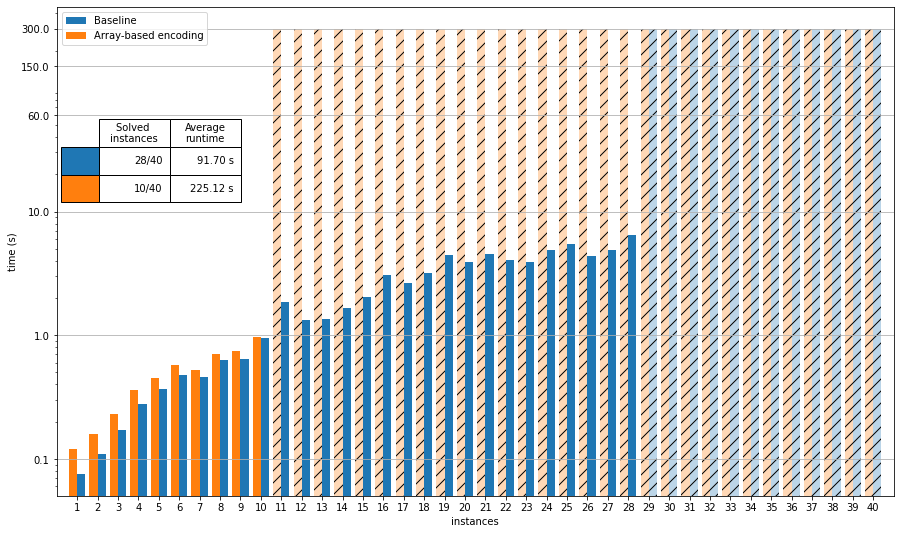

In [13]:
w = 0.4

baseline = load_json('timings/SMT-a-base.json')
array = load_json('timings/SMT-a-array.json')

bl_done = np.argwhere(baseline < 300).squeeze()
ar_done = np.argwhere(array < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
ar_timeout = np.argwhere(array >= 300).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
r1 = ax.bar(bl_done + (w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(ar_done - (w/2) + 1, array[ar_done], width=w, color='C1', align='center', 
            label='Array-based encoding')
r3 = ax.bar(bl_timeout + (w/2) + 1, baseline[bl_timeout], width=w, color='C0', 
            hatch='//', alpha=0.3, align='center')
r4 = ax.bar(ar_timeout - (w/2) + 1, array[ar_timeout], width=w, color='C1', 
            hatch='//', alpha=0.3, align='center')

table = make_table([baseline, array])

ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig('SMT_array')
plt.show()

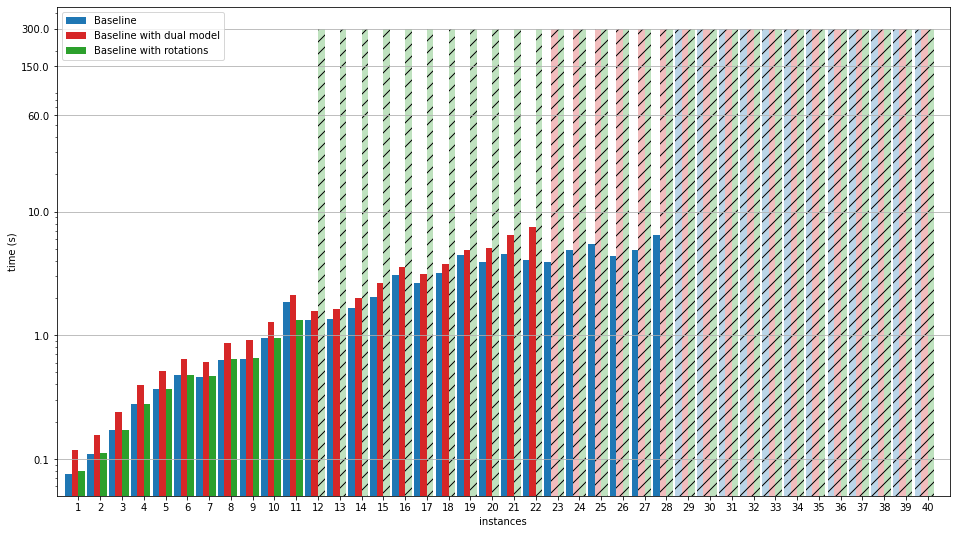

In [14]:
w = 0.3
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
baseline = load_json('timings/SMT-a-base.json')
dual = load_json('timings/SMT-a-dual-base.json')
rot = load_json('timings/SMT-a-rot-base.json')

bl_done = np.argwhere(baseline < 300).squeeze()
dual_done = np.argwhere(dual < 300).squeeze() 
rot_done = np.argwhere(rot < 300).squeeze() 
bl_timeout = np.argwhere(baseline >= 300).squeeze()
dual_timeout = np.argwhere(dual >= 300).squeeze()
rot_timeout = np.argwhere(rot >= 300).squeeze()


r1 = ax.bar(bl_done - (3*w/2) + 1, baseline[bl_done], width=w, color='C0', align='center', 
            label='Baseline')
r2 = ax.bar(dual_done - (w/2) + 1, dual[dual_done], width=w, color='C3', align='center', 
            label='Baseline with dual model')
r3 = ax.bar(rot_done + (w/2) + 1, rot[rot_done], width=w, color='C2', align='center', 
            label='Baseline with rotations')
r4 = ax.bar(bl_timeout - (3*w/2) + 1, baseline[bl_timeout], width=w, color='C0', hatch='//', alpha=0.3, align='center')
r5 = ax.bar(dual_timeout - (w/2) + 1, dual[dual_timeout], width=w, color='C3', hatch='//', alpha=0.3, align='center')
r6 = ax.bar(rot_timeout + (w/2) + 1, rot[rot_timeout], width=w, color='C2', hatch='//', alpha=0.3, align='center')
ax.set_xlabel('instances')
ax.set_ylabel('time (s)')
ax.set_xlim(0, 41)
ax.set_xticks(list(range(1, 41)))
ax.legend()
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 60, 150, 300])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(axis='y')
if savefig:
    fig.savefig(f'SMT_last')
plt.show()